In [1]:


!pip install -q keras-tuner

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks, initializers
import keras_tuner as kt
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
tf.random.set_seed(42)

def load_data():
    (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)
    x_val = x_train[-10000:]; y_val = y_train[-10000:]
    x_train = x_train[:-10000]; y_train = y_train[:-10000]
    return x_train, y_train, x_val, y_val, x_test, y_test

x_train, y_train, x_val, y_val, x_test, y_test = load_data()

def plot_history(history, title):
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.plot(history.history['accuracy'], label='train acc')
    plt.title(title)
    plt.legend()
    plt.show()

def create_model(regularizer=None, dropout_rate=0.0, initializer='glorot_uniform', batch_norm=False):
    model = keras.Sequential()
    model.add(layers.Input(shape=(28,28,1)))
    model.add(layers.Conv2D(32, 3, activation='relu', kernel_regularizer=regularizer, kernel_initializer=initializer))
    if batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.8 MB/s eta 0:00:00
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.8027 - loss: 0.5765 - val_accuracy: 0.8822 - val_loss: 0.3493
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.8903 - loss: 0.3241 - val_accuracy: 0.8941 - val_loss: 0.3142
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9070 - loss: 0.2782 - val_accuracy: 0.9007 - val_loss: 0.2907
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 24ms/step - accuracy: 0.9179 - loss: 0.2456 - val_accuracy: 0.9053 - val_loss: 0.2834
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.9267 - loss: 0.2222 - val_accuracy: 0.9047 - val_loss: 0.2812
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.9350 - loss: 0.2007 - val_accuracy: 0.9075 - val_loss: 0.2804
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.9422 - loss: 0.1814 - val_accuracy: 0.9070 - val_loss: 0.2844
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9487 -

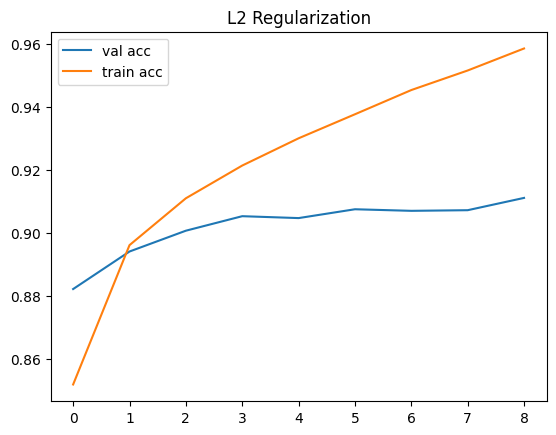

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.7930 - loss: 0.5762 - val_accuracy: 0.8881 - val_loss: 0.3218
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8790 - loss: 0.3321 - val_accuracy: 0.8952 - val_loss: 0.2876
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.8955 - loss: 0.2887 - val_accuracy: 0.8999 - val_loss: 0.2696
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.9026 - loss: 0.2595 - val_accuracy: 0.9078 - val_loss: 0.2574
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.9108 - loss: 0.2403 - val_accuracy: 0.9100 - val_loss: 0.2471
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9189 - loss: 0.2168 - val_accuracy: 0.9110 - val_loss: 0.2491
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.9244 - loss: 0.2029 - val_accuracy: 0.9141 - val_loss: 0.2439
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9274 -

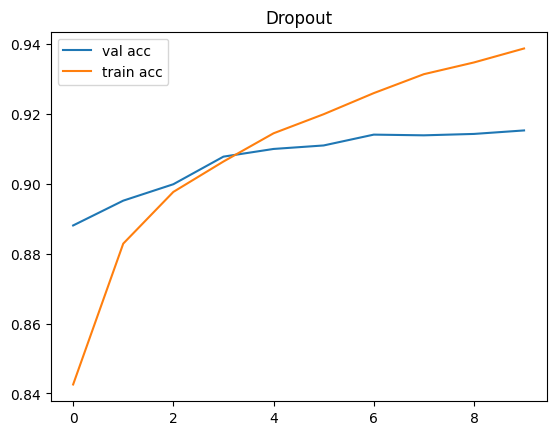

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.8345 - loss: 0.4746 - val_accuracy: 0.8956 - val_loss: 0.2898
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9110 - loss: 0.2413 - val_accuracy: 0.8971 - val_loss: 0.2914
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.9300 - loss: 0.1864 - val_accuracy: 0.8939 - val_loss: 0.3311
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.9451 - loss: 0.1488 - val_accuracy: 0.8990 - val_loss: 0.3321


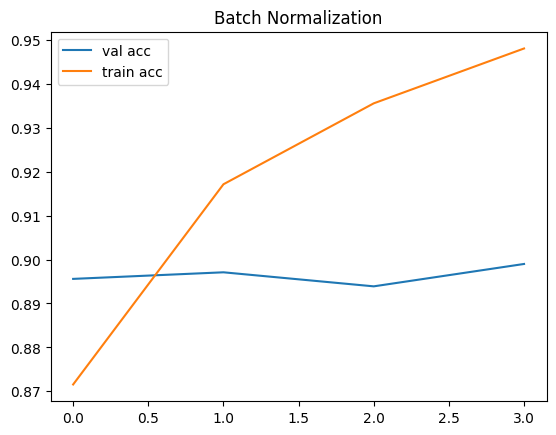

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.8243 - loss: 0.5005 - val_accuracy: 0.8974 - val_loss: 0.2838
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.9058 - loss: 0.2593 - val_accuracy: 0.9049 - val_loss: 0.2646
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9261 - loss: 0.2062 - val_accuracy: 0.9061 - val_loss: 0.2678
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9405 - loss: 0.1688 - val_accuracy: 0.9104 - val_loss: 0.2747
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9518 - loss: 0.1364 - val_accuracy: 0.9093 - val_loss: 0.2901


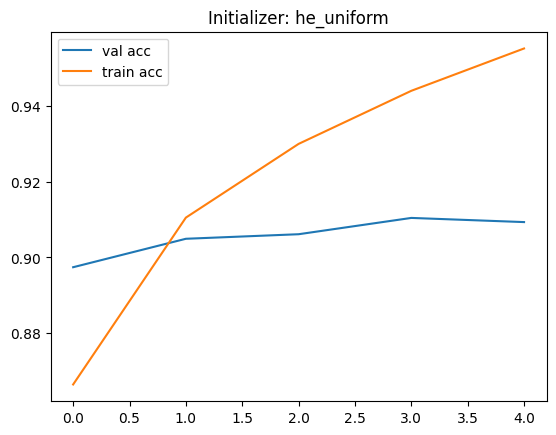

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8205 - loss: 0.5060 - val_accuracy: 0.8994 - val_loss: 0.2873
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.9029 - loss: 0.2662 - val_accuracy: 0.9060 - val_loss: 0.2622
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9222 - loss: 0.2131 - val_accuracy: 0.9074 - val_loss: 0.2669
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9354 - loss: 0.1763 - val_accuracy: 0.9059 - val_loss: 0.2738
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9479 - loss: 0.1456 - val_accuracy: 0.9084 - val_loss: 0.2825


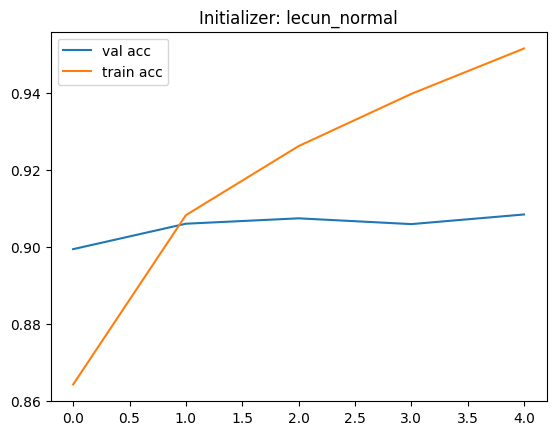

In [2]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_l2 = create_model(regularizer=regularizers.l2(0.01))
history_l2 = model_l2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[early_stop])
plot_history(history_l2, "L2 Regularization")

model_dropout = create_model(dropout_rate=0.5)
history_dropout = model_dropout.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[early_stop])
plot_history(history_dropout, "Dropout")

model_bn = create_model(batch_norm=True)
history_bn = model_bn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[early_stop])
plot_history(history_bn, "Batch Normalization")

for init in ['he_uniform', 'lecun_normal']:
    model_init = create_model(initializer=init)
    history_init = model_init.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[early_stop])
    plot_history(history_init, f"Initializer: {init}")

class MCDropout(layers.Dropout):
    def call(self, inputs, training=None):
        return super().call(inputs, training=True)




In [3]:
mc_model = keras.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    MCDropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
mc_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_mc = mc_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[early_stop])
plot_history(history_mc, "Monte Carlo Dropout")

class CustomL1(tf.keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, x):
        return self.factor * tf.reduce_sum(tf.abs(x))

model_custom_reg = create_model(regularizer=CustomL1(0.001))
history_custom_reg = model_custom_reg.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=[early_stop])
plot_history(history_custom_reg, "Custom L1 Regularizer")

logdir = "logs"
tb_callback = callbacks.TensorBoard(log_dir=logdir)
model_tb = create_model()
model_tb.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=[tb_callback])

def model_builder(hp):
    hp_units = hp.Int("units", min_value=32, max_value=256, step=32)
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(hp_units, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    hp_lr = hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.Hyperband(model_builder, objective='val_accuracy', max_epochs=5, directory='my_dir', project_name='keras_tune')
tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

best_model = tuner.get_best_models(1)[0]
loss, acc = best_model.evaluate(x_test, y_test)
print(f"Best tuned model test accuracy: {acc:.4f}")

Trial 10 Complete [00h 00m 39s]
val_accuracy: 0.8385999798774719

Best val_accuracy So Far: 0.8791999816894531
Total elapsed time: 00h 04m 38s
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8666 - loss: 0.3628
Best tuned model test accuracy: 0.8664
